**INF2178 - Experiments With Data**

**Technical Assignment 2**

**Professor Shion Gua**

**Student Name - Fatima Ashfaq**

Student ID - 1010784732

Date Created - 26 February 2024

Date Modified - 8 March 2024

URL Link to Report/Narrative:

https://docs.google.com/document/d/11S8eljREOUyGQ28NO4r-vQVar1nrUzsGe1l4vhsKcM4/edit?usp=sharing

In [1]:
#Mount google drive
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [38]:
#Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
%pip install bioinfokit
from bioinfokit.analys import stat

In [3]:
#Load the dataset
df = pd.read_excel('/drive/MyDrive/INF2178/INF2178_A2_data-2.xlsx')
df.head(10)

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y
6,7,1029,Air-O-Down Child Care Centre,Non Profit Agency,7 HAWKSDALE RD,M3K 1W3,6,Public High School,Downsview Secondary School,10,15,24,0,0,49,Y,Y
7,8,1031,Cedarbrae Day Nurseries (20 Greencrest),Commercial Agency,20 GREENCREST CIRCT,M1G 1B8,24,High Rise Apartment,Greencrest Property,0,0,16,0,30,46,Y,Y
8,9,1037,Tiago Avenue Community Child Care,Non Profit Agency,145 TIAGO AVE,M4B 2A6,19,Public Elementary School,Victoria Park Public School,0,0,21,0,30,51,Y,Y
9,10,1041,Ledbury Park Child Care Program,Non Profit Agency,95 FALKIRK ST,M5M 4K1,8,Public Elementary School,Ledbury Park Public School,0,0,24,39,90,153,Y,Y


In [4]:
#Checking the data types of variables
df.dtypes

_id             int64
LOC_ID          int64
LOC_NAME       object
AUSPICE        object
ADDRESS        object
PCODE          object
ward            int64
bldg_type      object
BLDGNAME       object
IGSPACE         int64
TGSPACE         int64
PGSPACE         int64
KGSPACE         int64
SGSPACE         int64
TOTSPACE        int64
subsidy        object
cwelcc_flag    object
dtype: object

In [5]:
#Update _id, LOC_ID, and ward data types from integer to object
df['_id'] = df['_id'].astype(str)
df['LOC_ID'] = df['LOC_ID'].astype(str)
df['ward'] = df['ward'].astype(str)

df.dtypes

_id            object
LOC_ID         object
LOC_NAME       object
AUSPICE        object
ADDRESS        object
PCODE          object
ward           object
bldg_type      object
BLDGNAME       object
IGSPACE         int64
TGSPACE         int64
PGSPACE         int64
KGSPACE         int64
SGSPACE         int64
TOTSPACE        int64
subsidy        object
cwelcc_flag    object
dtype: object

In [6]:
#Check for missing values
df.isnull().sum()

_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64

# Exploratory Data Analysis (EDA)

**Non-Graphical EDA**

In [7]:
#Initial Descriptive Statistics
df.describe()

,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


In [8]:
def get_summary_statistics(df):

  mean = np.round(np.mean(df), 2)
  median = np.round(np.median(df), 2)
  min_value = np.round(df.min(), 2)
  max_value = np.round(df.max(), 2)

  print('Min: ', min_value)
  print('Max: ', max_value)
  print('Median: ', median)
  print('Mean: ', mean)

In [9]:
print ("Descriptive Statistics for Infant Care (IGSPACE)")
get_summary_statistics(df.IGSPACE)
print()

print ("Descriptive Statistics for Toddler Care (TGSPACE)")
get_summary_statistics(df.TGSPACE)
print()

print ("Descriptive Statistics for Pre-Schoolers Care (PGSPACE)")
get_summary_statistics(df.PGSPACE)
print()

print ("Descriptive Statistics for Full-Day KG Care (KGSPACE)")
get_summary_statistics(df.KGSPACE)
print()

print ("Descriptive Statistics for Grade One and Higher Care (SGSPACE)")
get_summary_statistics(df.SGSPACE)
print()

print ("Descriptive Statistics for All Categories Care (TOTSPACE)")
get_summary_statistics(df.TOTSPACE)
print()

Descriptive Statistics for Infant Care (IGSPACE)
Min:  0
Max:  30
Median:  0.0
Mean:  3.9

Descriptive Statistics for Toddler Care (TGSPACE)
Min:  0
Max:  90
Median:  10.0
Mean:  11.6

Descriptive Statistics for Pre-Schoolers Care (PGSPACE)
Min:  0
Max:  144
Median:  24.0
Mean:  24.26

Descriptive Statistics for Full-Day KG Care (KGSPACE)
Min:  0
Max:  130
Median:  0.0
Mean:  14.26

Descriptive Statistics for Grade One and Higher Care (SGSPACE)
Min:  0
Max:  285
Median:  0.0
Mean:  21.66

Descriptive Statistics for All Categories Care (TOTSPACE)
Min:  6
Max:  402
Median:  62.0
Mean:  75.67



**Graphical EDA**

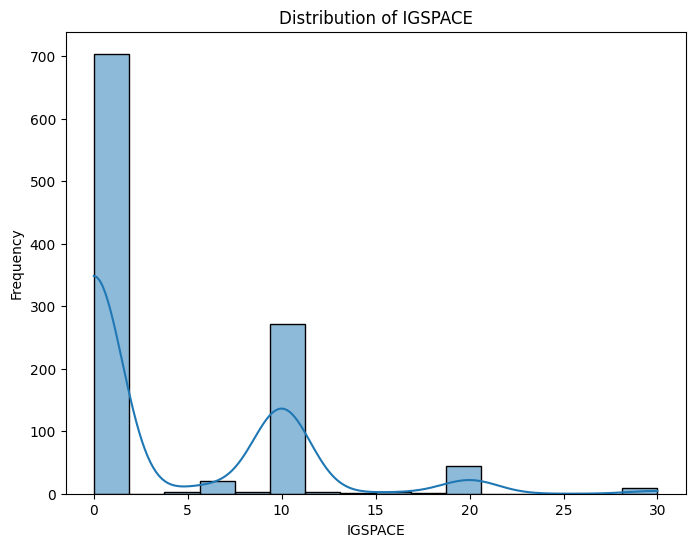

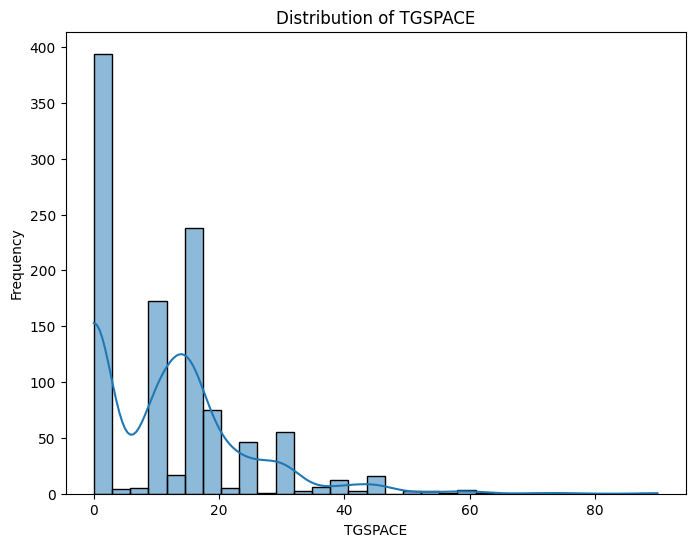

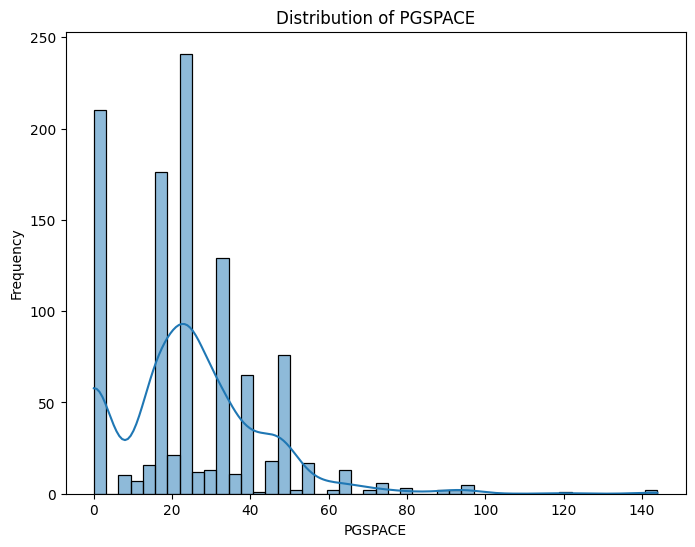

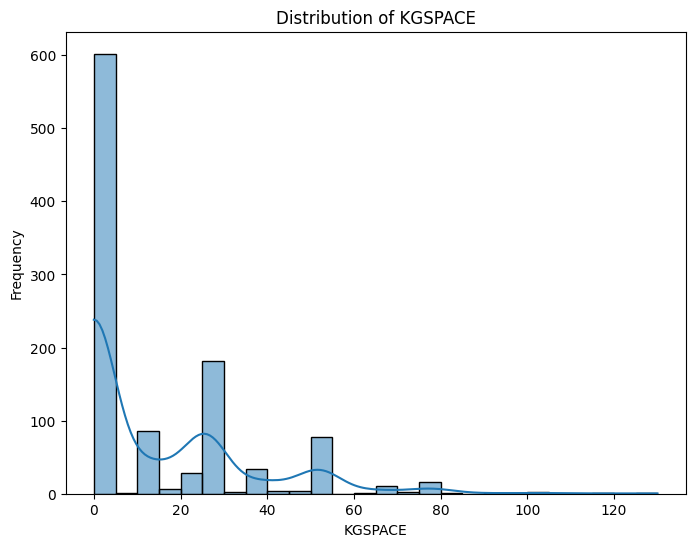

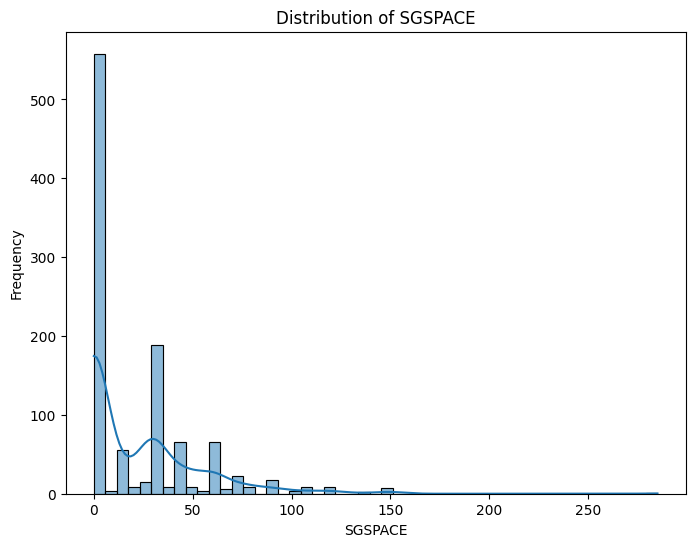

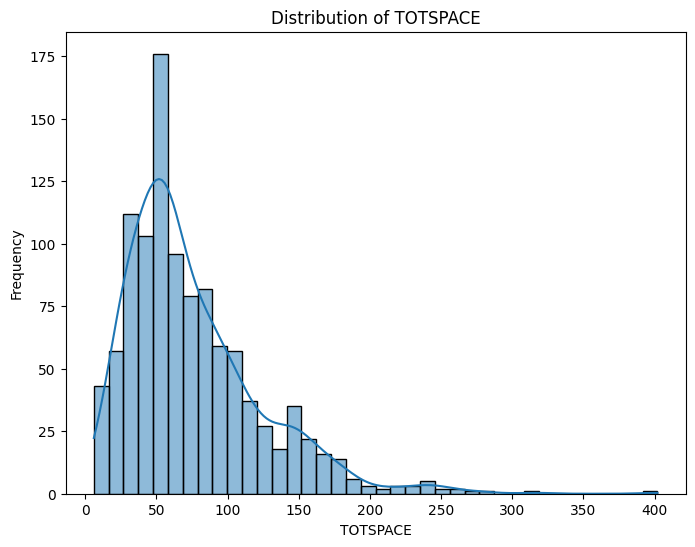

In [10]:
# Visualisation 1 - Histogram of Care Type (Age Groups)
# This histogram aims to help in understanding the spread and shape of the distribution for each care type in the dataset
# providing insights into the data's central tendency, spread, and potential outliers.

numerical_cols = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

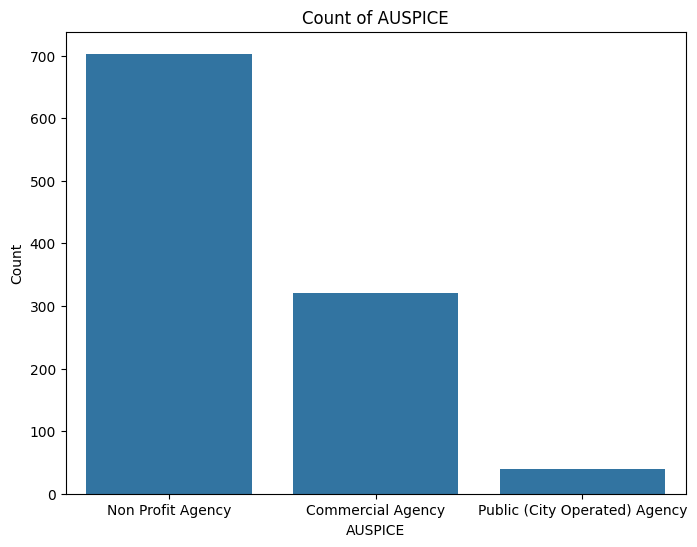

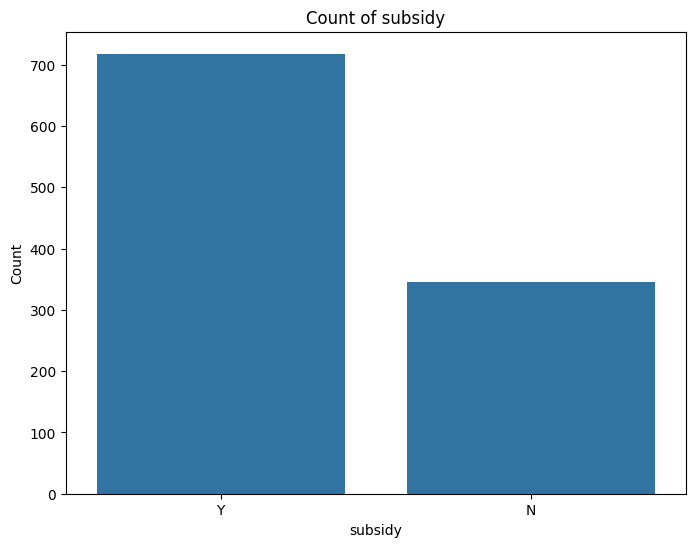

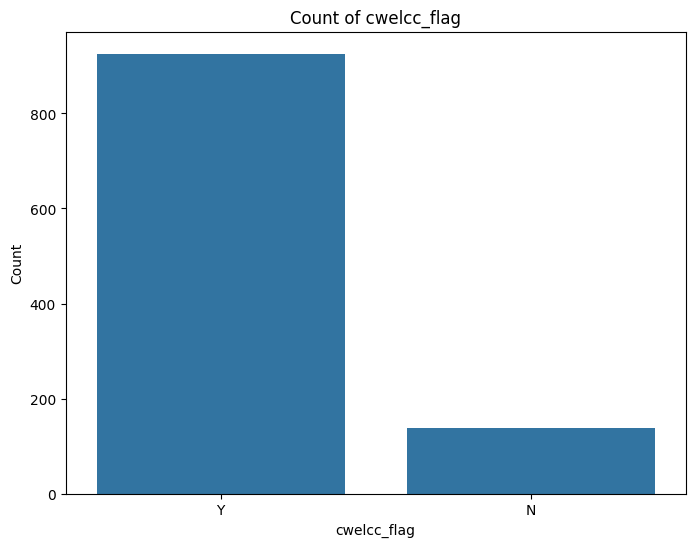

In [11]:
# Visualisation 2 - Barchart
# This visualisation aims to provide a quick overview of the distribution of categorical variables in the dataset, showing the frequency of each category within the variables AUSPICE, subsidy, and cwelcc_flag.
# It helps in understanding the distribution of categorical data and identifying any imbalances or dominant categories.

categorical_cols = ['AUSPICE', 'subsidy', 'cwelcc_flag']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

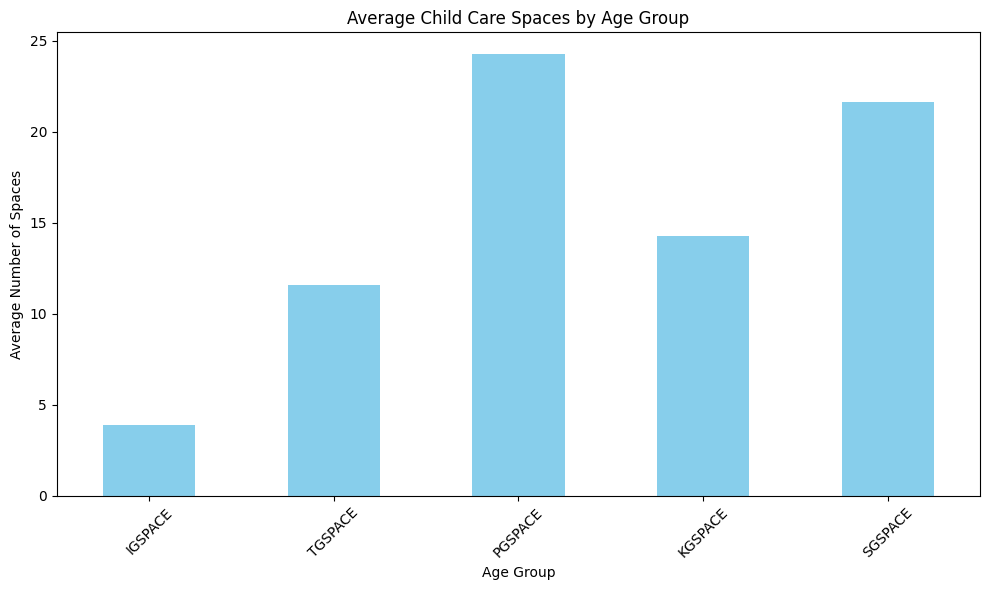

In [12]:
# Visualisation 3 - Barchart showing the average number of childcare spaces for each age group.

age_groups = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']
mean_spaces = df[age_groups].mean()

plt.figure(figsize=(10, 6))
mean_spaces.plot(kind='bar', color='skyblue')
plt.title('Average Child Care Spaces by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Spaces')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Total Capacity')

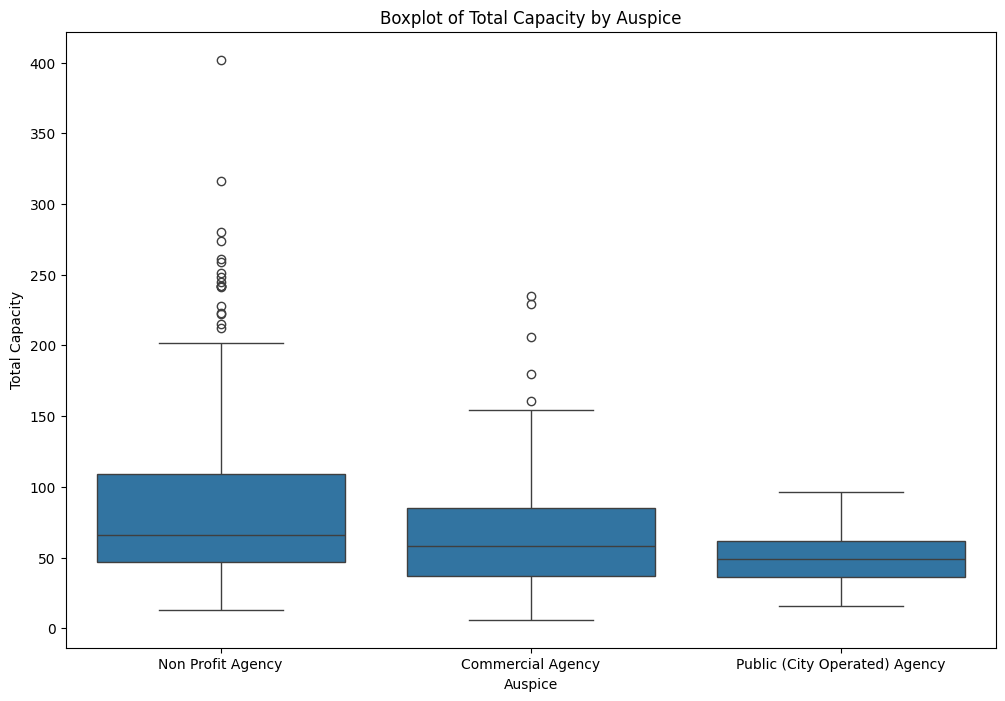

In [13]:
 # Visualisation 4 - Boxplot of total capacity by auspice

plt.figure(figsize=(12, 8))
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df)
plt.title('Boxplot of Total Capacity by Auspice')
plt.xlabel('Auspice')
plt.ylabel('Total Capacity')

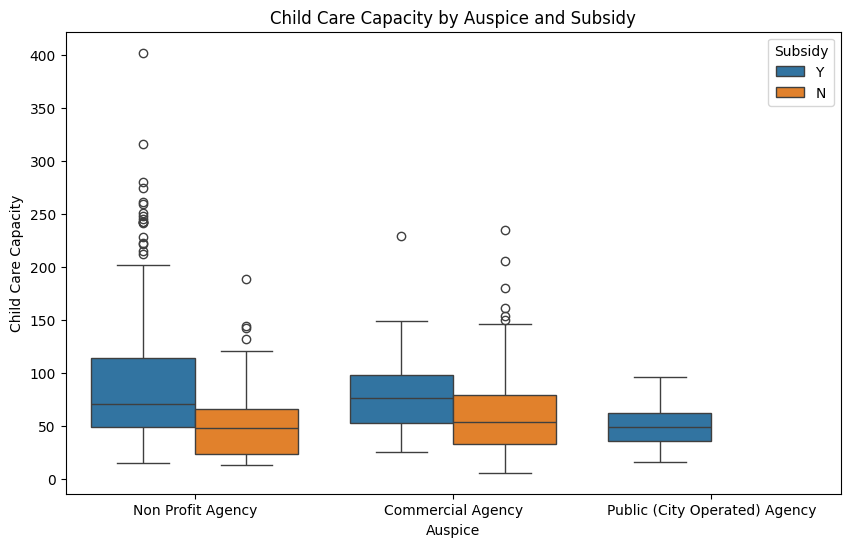

In [14]:
# Visualisation 5 - Boxplot
# This boxplot aims to show the distribution of childcare capacity across different auspices and subsidy statuses,

plt.figure(figsize=(10, 6))
sns.boxplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', data=df)
plt.title('Child Care Capacity by Auspice and Subsidy')
plt.xlabel('Auspice')
plt.ylabel('Child Care Capacity')
plt.legend(title='Subsidy', loc='upper right')
plt.show()

# One-Way ANOVA

**Null Hypothesis ($H_0$):** There is no significant difference in the mean child care spaces ('IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE') across the different treatments (AUSPICE).

**Alternative Hypothesis ($H_1$):** At least one pair of means of the child care spaces across the different treatments are significantly different from each other.

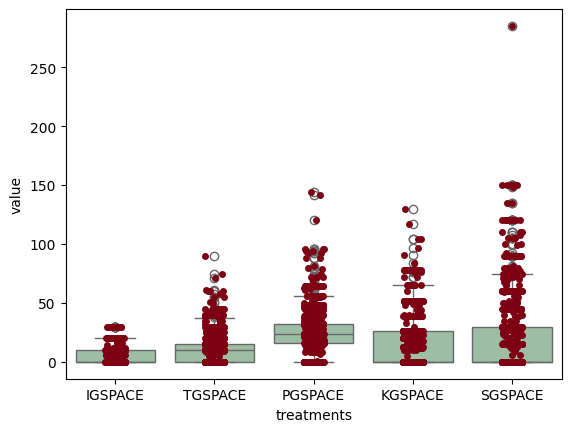

In [18]:
df_melt = pd.melt(df.reset_index(), id_vars=['_id'], value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'])
df_melt.columns = ['index', 'treatments', 'value']

# Visualisation 6 - Boxplot to see the data distribution by treatments.
# Using boxplot, we can easily detect the differences between different treatments
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.stripplot(x='treatments', y='value', data=df_melt, color='#7d0013')
plt.show()

In [19]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),4.0,2.821233e+05,70530.816839,188.190768,4.517383e-151
Residual,5310.0,1.990101e+06,374.783617,NaN,NaN


**Post Hoc Test**

In [20]:
#post hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE,TGSPACE,7.703669,5.412308,9.995029,12.974001,0.001000
1,IGSPACE,PGSPACE,20.362183,18.070822,22.653543,34.292619,0.001000
2,IGSPACE,KGSPACE,10.361242,8.069881,12.652602,17.449707,0.001000
3,IGSPACE,SGSPACE,17.764817,15.473456,20.056177,29.918310,0.001000
4,TGSPACE,PGSPACE,12.658514,10.367153,14.949874,21.318618,0.001000
5,TGSPACE,KGSPACE,2.657573,0.366213,4.948933,4.475706,0.013527
6,TGSPACE,SGSPACE,10.061148,7.769787,12.352508,16.944309,0.001000
7,PGSPACE,KGSPACE,10.000941,7.709580,12.292301,16.842912,0.001000
8,PGSPACE,SGSPACE,2.597366,0.306006,4.888726,4.374309,0.017028
9,KGSPACE,SGSPACE,7.403575,5.112214,9.694935,12.468603,0.001000


**Testing Model Assumptions**

Assumption 1 - Residuals are normally distributed.

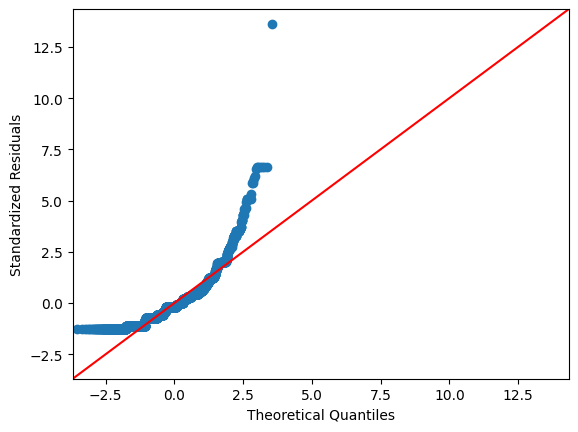

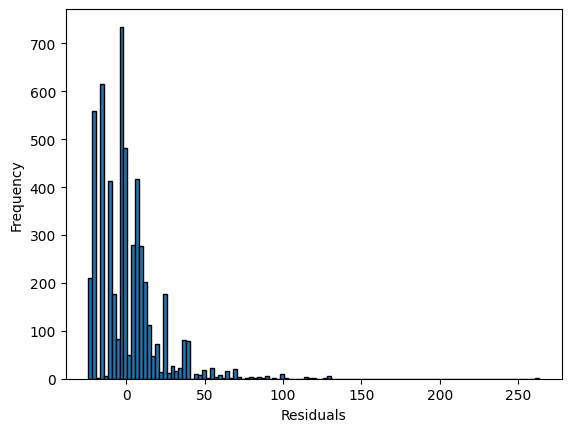

In [21]:
# QQ plot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [22]:
# Shapiro Wilk Test to check if residuals are normally distributed
w, pvalue = stats.shapiro(model.resid)
print("W-Value: ", w)
print("P-Value: ", pvalue)

W-Value:  0.8427014350891113
P-Value:  0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Assumption 2 - Homogeneous variances.

In [23]:
#Using Levene's test as the sample is not normally distributed
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),142.6228
1,Degrees of freedom (Df),4.0000
2,p value,0.0000


# Two-Way ANOVA

Null Hypothesis 1 ($H0_1$): There is no significant difference in the child care spaces according to the space's participation in CWELCC

Null Hypothesis 2 ($H0_2$): There is no significant difference in the child care spaces according to the subsidy fee contract status of the center.

Null Hypothesis 3 ($H0_3$): There are no interaction effects.

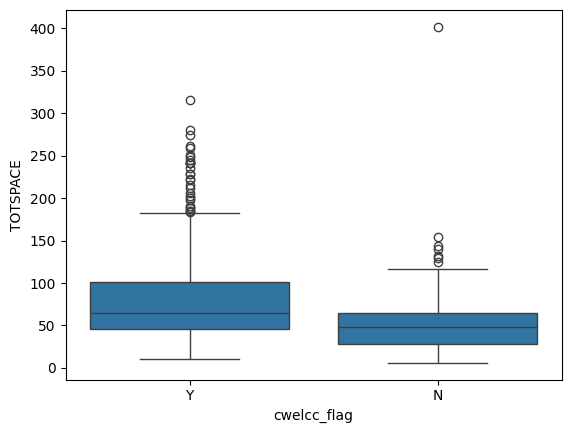

In [24]:
#Boxplot to compare the distribution of TOTSPACE (total care spaces) values between the CWELCC Flag categories.
ax = sns.boxplot (x = "cwelcc_flag", y = "TOTSPACE", data = df)

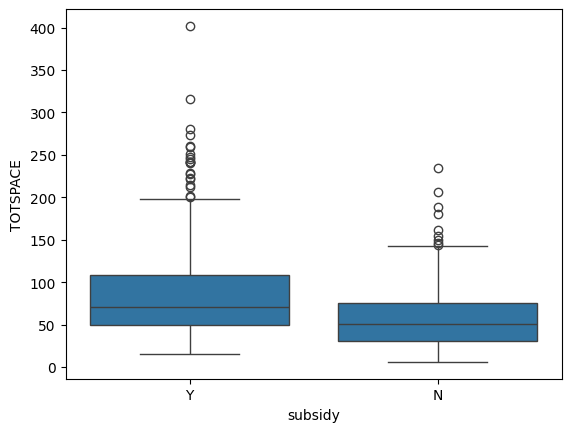

In [25]:
#Boxplot to compare the distribution of TOTSPACE across the two categories of Subsidy.
ax = sns.boxplot (x = "subsidy", y= "TOTSPACE", data = df)

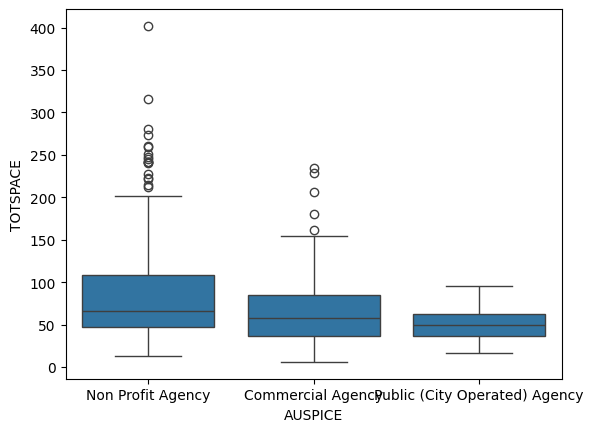

In [27]:
#Boxplot to compare the distribution of TOTSPACE across Auspices.
ax = sns.boxplot (x = "AUSPICE", y = "TOTSPACE", data = df)

             AUSPICE subsidy cwelcc_flag care_type  spaces
0  Non Profit Agency       Y           Y   IGSPACE       0
1  Non Profit Agency       Y           Y   IGSPACE       0
2  Non Profit Agency       Y           Y   IGSPACE       0
3  Non Profit Agency       Y           Y   IGSPACE      10
4  Non Profit Agency       Y           Y   IGSPACE       0


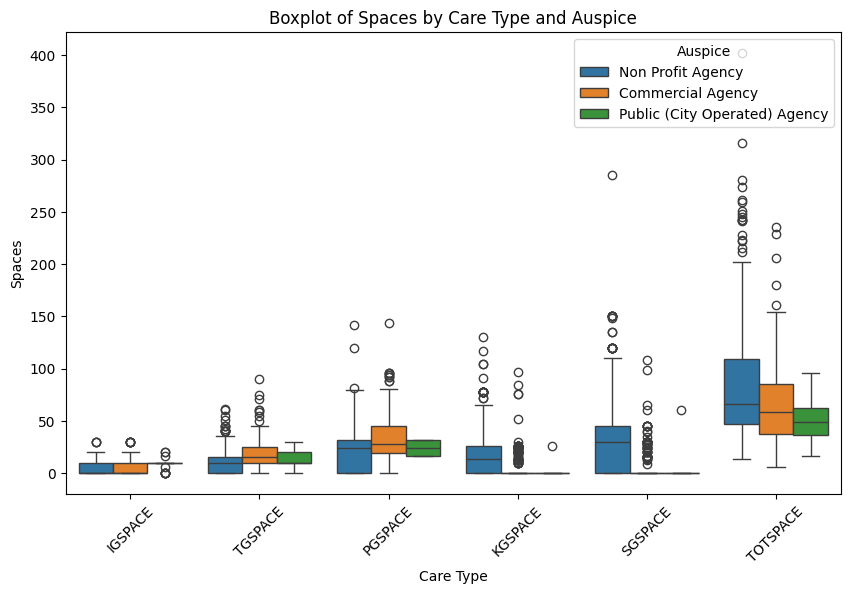

In [31]:
# Melt the dataframe into long-form
df_melted = pd.melt(df, id_vars=['AUSPICE','subsidy', 'cwelcc_flag'],
                    value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE'],
                    var_name='care_type', value_name='spaces')

# Display the first few rows of the melted dataframe
print(df_melted.head())

#Boxplot to compare the distributions of care spaces
plt.figure(figsize=(10, 6))
sns.boxplot(x='care_type', y='spaces', data=df_melted, hue='AUSPICE')
plt.title('Boxplot of Spaces by Care Type and Auspice')
plt.xlabel('Care Type')
plt.ylabel('Spaces')
plt.legend(title='Auspice', loc='upper right')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

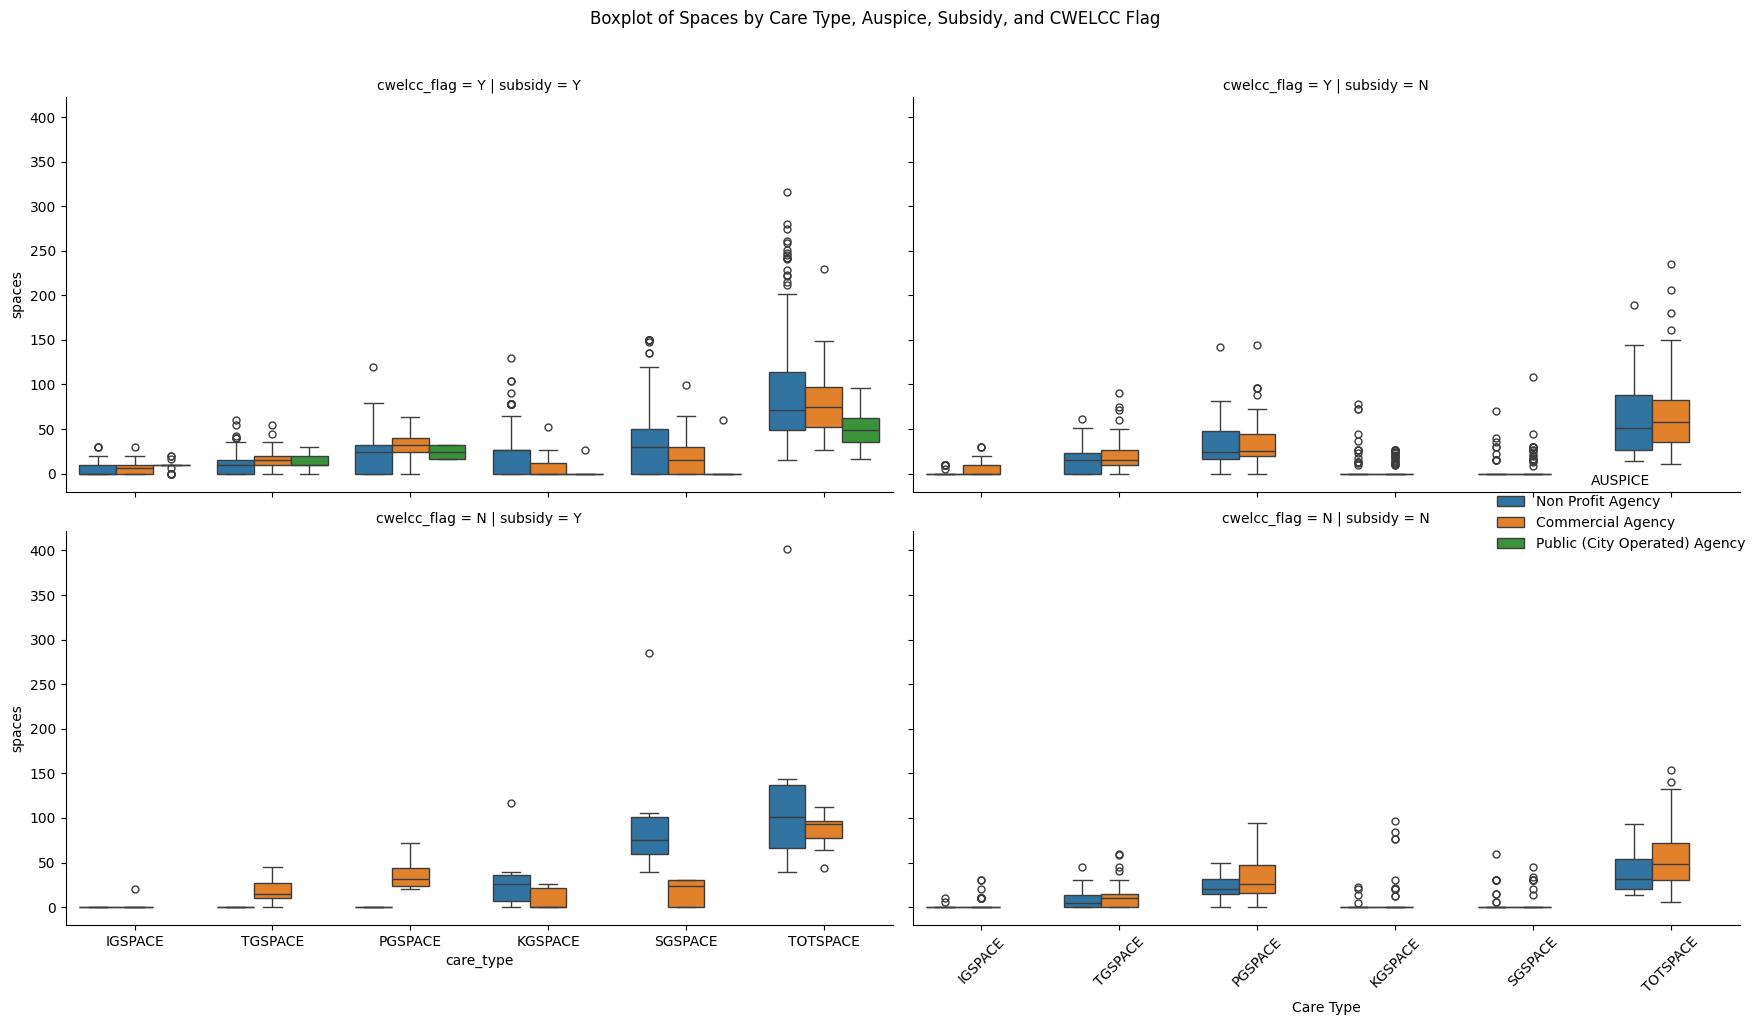

In [32]:
plt.figure(figsize=(14, 8))
sns.catplot(x='care_type', y='spaces', data=df_melted, kind='box',
            hue='AUSPICE', col='subsidy', row='cwelcc_flag', height=5, aspect=1.5)
plt.suptitle('Boxplot of Spaces by Care Type, Auspice, Subsidy, and CWELCC Flag', y=1.02)
plt.xlabel('Care Type')
plt.ylabel('Spaces')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
formula = 'TOTSPACE ~ C(cwelcc_flag) + C(subsidy) + C(cwelcc_flag): C(subsidy)'
model = ols (formula, df). fit()

#ANOVA Table
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

,sum_sq,df,F,PR(>F)
C(cwelcc_flag),6.723429e+03,1.0,3.176381,7.499648e-02
C(subsidy),9.816181e+04,1.0,46.375040,1.633653e-11
C(cwelcc_flag):C(subsidy),1.910868e+04,1.0,9.027604,2.721895e-03
Residual,2.241580e+06,1059.0,NaN,NaN


**Interaction Plots**

<ipython-input-36-537902a24411>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='cwelcc_flag', y='TOTSPACE', hue='subsidy', data=df, ci=None)


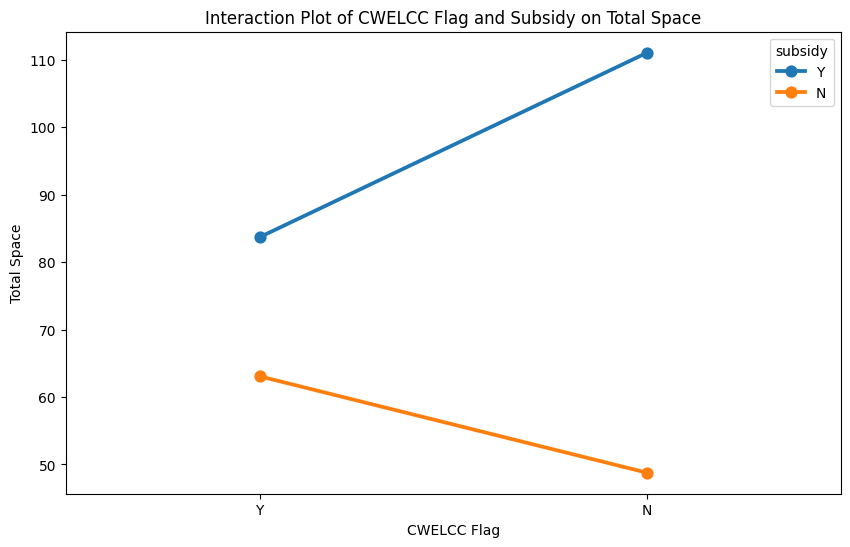

In [36]:
# Interaction Plot of CWELCC Flag and Subsidy on Total Space

plt.figure(figsize=(10, 6))
sns.pointplot(x='cwelcc_flag', y='TOTSPACE', hue='subsidy', data=df, ci=None)
plt.title('Interaction Plot of CWELCC Flag and Subsidy on Total Space')
plt.xlabel('CWELCC Flag')
plt.ylabel('Total Space')
plt.show()


<Figure size 1000x600 with 0 Axes>

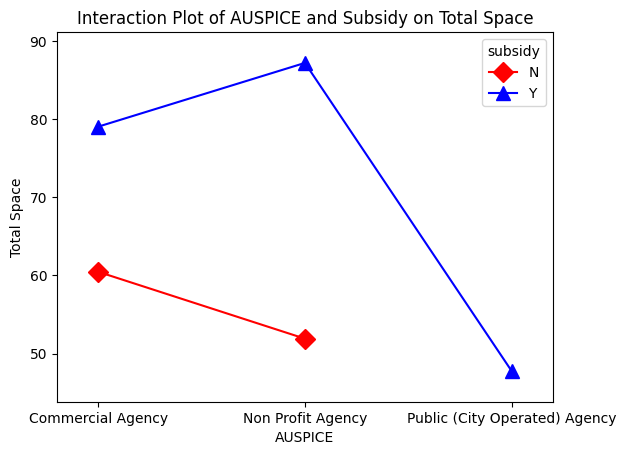

In [40]:
# Interaction Plot of AUSPICE and Subsidy on Total Space

plt.figure(figsize=(10, 6))
interaction_plot(x=df['AUSPICE'], trace=df['subsidy'], response=df['TOTSPACE'],
                 colors=['red', 'blue'], markers=['D', '^'], ms=10)

plt.title('Interaction Plot of AUSPICE and Subsidy on Total Space')
plt.xlabel('AUSPICE')
plt.ylabel('Total Space')
plt.show()

<Figure size 1000x600 with 0 Axes>

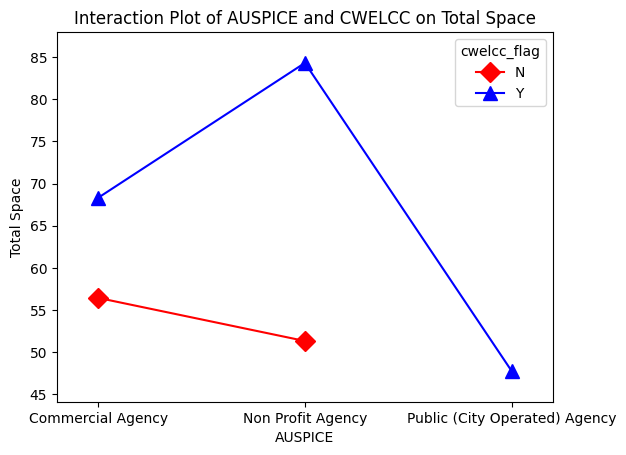

In [41]:
# Interaction Plot of AUSPICE and CWELCC on Total Space

plt.figure(figsize=(10, 6))
interaction_plot(x=df['AUSPICE'], trace=df['cwelcc_flag'], response=df['TOTSPACE'],
                 colors=['red', 'blue'], markers=['D', '^'], ms=10)

plt.title('Interaction Plot of AUSPICE and CWELCC on Total Space')
plt.xlabel('AUSPICE')
plt.ylabel('Total Space')
plt.show()

**Post Hoc Test**

In [42]:
# Performing Tukey's HSD Test
tukey_result = stat()
tukey_result.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var= ['cwelcc_flag', 'subsidy'], anova_model=formula)

# Accessing Tukey Summary Table
tukey_summary = tukey_result.tukey_summary
tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Y, Y)","(Y, N)",29.128683,14.090822,44.166544,7.054287,0.001000
1,"(Y, Y)","(N, Y)",30.320515,-9.030303,69.671332,2.806087,0.194903
2,"(Y, Y)","(N, N)",40.489249,22.077829,58.900670,8.008861,0.001000
3,"(Y, N)","(N, Y)",59.449198,18.030838,100.867558,5.227228,0.001344
4,"(Y, N)","(N, N)",11.360566,-11.133302,33.854434,1.839307,0.555438
5,"(N, Y)","(N, N)",70.809764,28.050863,113.568666,6.030939,0.001000


**Testing Model Assumptions**

Assumption 1 - Residuals are normally distributed.

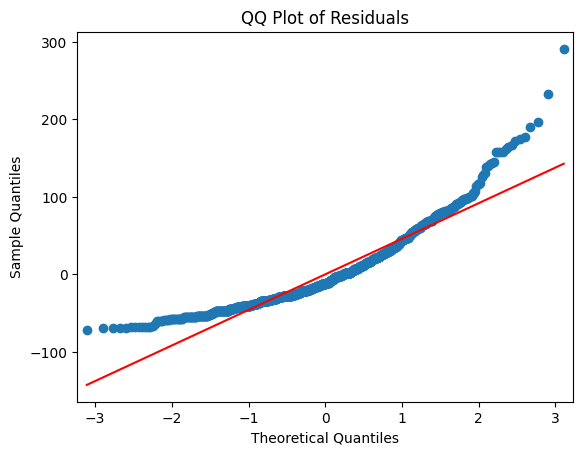

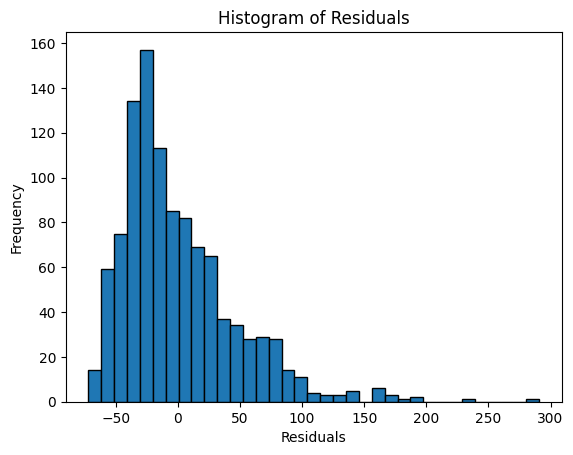

In [43]:
#Getting the residuals
residuals = model.resid

# QQ Plot
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

# Histogram
plt.hist(residuals, bins='auto', histtype = 'bar', ec = 'k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [44]:
# Shapiro-Wilk test for normality

shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk test for normality:")
print("Test Statistic:", shapiro_test[0])
print("p-value:", shapiro_test[1])

Shapiro-Wilk test for normality:
Test Statistic: 0.8959829211235046
p-value: 3.337903758624965e-26


Assumption 2 - Homogeneous variances.

In [45]:
# Using Levene's test for homogeneity of variances as sample is not normally distributed.
levene_test = stats.levene(*[residuals[df['cwelcc_flag'] == flag] for flag in df['cwelcc_flag'].unique()])
print("\nLevene's test for homogeneity of variances:")
print("Test Statistic:", levene_test[0])
print("p-value:", levene_test[1])


Levene's test for homogeneity of variances:
Test Statistic: 9.85999343409544
p-value: 0.0017358062105500933
